In [260]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [261]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
gen=pd.read_csv('gender_submission.csv')

In [262]:
data=pd.concat([train,test])

In [263]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [264]:
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


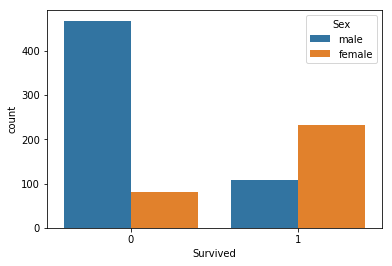

In [265]:
sns.countplot(x='Survived',data=train,hue='Sex')

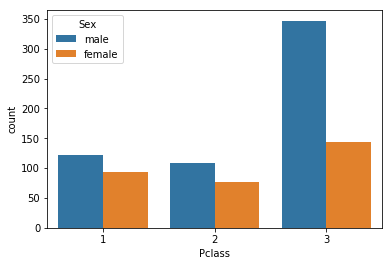

In [266]:
sns.countplot(x='Pclass',data=train,hue='Sex')

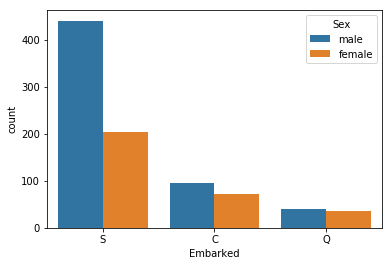

In [267]:
sns.countplot(x='Embarked',data=train,hue='Sex')

In [268]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1,0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown','Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

In [269]:
def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

In [270]:
def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    

In [271]:
data=simplify_ages(data)
data=format_name(data)
data=simplify_fares(data)

In [272]:
data.Cabin.fillna('N',inplace=True)
data.Cabin=data.Cabin.apply( lambda x:x[0] )

In [273]:
features=['Name','Ticket','Embarked']
for i in features:
    data.drop(i,axis=1,inplace=True)
    

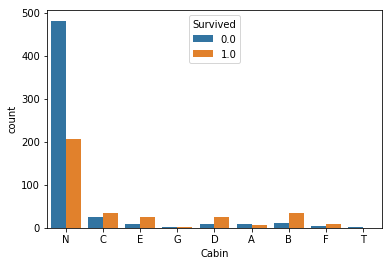

In [274]:
sns.countplot(x='Cabin',data=data,hue='Survived')

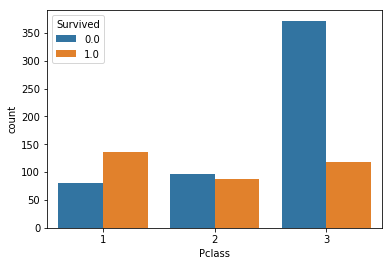

In [275]:
sns.countplot(x='Pclass',data=data,hue='Survived')

In [276]:
from sklearn.preprocessing import LabelEncoder

In [278]:
data.isnull().sum()

Age              0
Cabin            0
Fare             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Lname            0
NamePrefix       0
dtype: int64

In [279]:
data.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Lname,NamePrefix
0,Student,N,1_quartile,0,1,3,male,1,0.0,"Braund,",Mr.
1,Adult,C,4_quartile,0,2,1,female,1,1.0,"Cumings,",Mrs.
2,Young Adult,N,1_quartile,0,3,3,female,0,1.0,"Heikkinen,",Miss.
3,Young Adult,C,4_quartile,0,4,1,female,1,1.0,"Futrelle,",Mrs.
4,Young Adult,N,2_quartile,0,5,3,male,0,0.0,"Allen,",Mr.


In [280]:
features=['Sex','Cabin','Age','Fare','NamePrefix','Lname']

for i in features:
    le=LabelEncoder()
    data[i]=le.fit_transform(data[i])

In [281]:
data.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Lname,NamePrefix
0,4,7,0,0,1,3,1,1,0.0,100,19
1,0,2,3,0,2,1,0,1,1.0,182,20
2,7,7,0,0,3,3,0,0,1.0,329,16
3,7,2,3,0,4,1,0,1,1.0,267,20
4,7,7,1,0,5,3,1,0,0.0,15,19


In [284]:
sorted(data['Lname'].unique())[-1]

867

In [285]:
y=data['Survived'].iloc[:train.shape[0]]
data.drop('Survived',axis=1,inplace=True)

from sklearn.model_selection import  train_test_split


In [286]:
data.drop('PassengerId',axis=1,inplace=True)

In [287]:
train=data[:train.shape[0]]
test=data[train.shape[0]:]
X=train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((623, 9), (268, 9))

In [288]:
train.head()

,Age,Cabin,Fare,Parch,Pclass,Sex,SibSp,Lname,NamePrefix
0,4,7,0,0,3,1,1,100,19
1,0,2,3,0,1,0,1,182,20
2,7,7,0,0,3,0,0,329,16
3,7,2,3,0,1,0,1,267,20
4,7,7,1,0,3,1,0,15,19


In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

In [290]:
from sklearn.metrics import  accuracy_score,make_scorer
from sklearn.model_selection import GridSearchCV

In [291]:
m2=LogisticRegression()
m3=RandomForestClassifier()
m4=XGBClassifier()

In [292]:

LR_params={
    'C':[1,10,100],
}
rbf_params={
    'n_estimators': [4,6,9], 
    'max_features': ['log2', 'sqrt','auto'], 
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 5, 10], 
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1,5,8]
}

In [294]:
acc_score=make_scorer(accuracy_score)

## Logistic Regression with GridSearchCV

In [295]:
clf=GridSearchCV(m2,LR_params,scoring=acc_score)
clf.fit(X_train,y_train)
clf=clf.best_estimator_

In [296]:
clf.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [297]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8022388059701493


## Logistic Regression with KFold

In [299]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.833333333333
Fold 2 accuracy: 0.808988764045
Fold 3 accuracy: 0.741573033708
Fold 4 accuracy: 0.842696629213
Fold 5 accuracy: 0.786516853933
Fold 6 accuracy: 0.775280898876
Fold 7 accuracy: 0.775280898876
Fold 8 accuracy: 0.752808988764
Fold 9 accuracy: 0.842696629213
Fold 10 accuracy: 0.76404494382
Mean Accuracy: 0.792322097378


## Random Forest with GridSearch

In [300]:
clf=GridSearchCV(m3,rbf_params,scoring=acc_score)
clf.fit(X_train,y_train)
clf=clf.best_estimator_

In [301]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [302]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8134328358208955


In [303]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.788888888889
Fold 2 accuracy: 0.85393258427
Fold 3 accuracy: 0.797752808989
Fold 4 accuracy: 0.831460674157
Fold 5 accuracy: 0.85393258427
Fold 6 accuracy: 0.797752808989
Fold 7 accuracy: 0.752808988764
Fold 8 accuracy: 0.786516853933
Fold 9 accuracy: 0.865168539326
Fold 10 accuracy: 0.820224719101
Mean Accuracy: 0.814843945069


In [304]:
ids = gen['PassengerId']
predictions = clf.predict(test)


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0


In [305]:
print accuracy_score(predictions,gen['Survived'])

0.8971291866028708


In [307]:
import xgboost as xgb

In [308]:
from sklearn.cross_validation import StratifiedKFold

In [309]:
xgb_model=XGBClassifier()

In [310]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

In [314]:
clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(y_train, n_folds=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

In [315]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.7, silent=1, missing=-999, learning_rate=0.05, nthread=4, min_child_weight=11, n_estimators=5, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 
[CV] colsample_bytree=0.7, silent=1, missing=-999, learning_rate=0.05, nthread=4, min_child_weight=11, n_estimators=5, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 
[CV] colsample_bytree=0.7, silent=1, missing=-999, learning_rate=0.05, nthread=4, min_child_weight=11, n_estimators=5, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 
[CV] colsample_bytree=0.7, silent=1, missing=-999, learning_rate=0.05, nthread=4, min_child_weight=11, n_estimators=5, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 
[CV] colsample_bytree=0.7, silent=1, missing=-999, learning_rate=0.05, nthread=4, min_child_weight=11, n_estimators=5, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 
[CV]  colsample_

[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.7s


[CV]  colsample_bytree=0.7, silent=1, missing=-999, learning_rate=0.05, nthread=4, min_child_weight=11, n_estimators=5, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6, total=   3.2s
[CV]  colsample_bytree=0.7, silent=1, missing=-999, learning_rate=0.05, nthread=4, min_child_weight=11, n_estimators=5, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6, total=   3.2s
[CV]  colsample_bytree=0.7, silent=1, missing=-999, learning_rate=0.05, nthread=4, min_child_weight=11, n_estimators=5, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6, total=   3.4s


[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    3.4s finished


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1. 0. ... 1. 0.], n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'missing': [-999], 'learning_rate': [0.05], 'n_estimators': [5], 'seed': [1337], 'colsample_bytree': [0.7], 'silent': [1], 'nthread': [4], 'min_child_weight': [11], 'subsample': [0.8], 'objective': ['binary:logistic'], 'max_depth': [6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [320]:
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))




('Raw AUC score:', 0.8289484183819117)
colsample_bytree: 0.7
learning_rate: 0.05
max_depth: 6
min_child_weight: 11
missing: -999
n_estimators: 5
nthread: 4
objective: 'binary:logistic'
seed: 1337
silent: 1
subsample: 0.8


/home/ashish/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [321]:
test_probs = clf.predict(X_test)
print accuracy_score(test_probs,y_test)

0.7649253731343284


/home/ashish/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [322]:
ids = gen['PassengerId']
predictions = clf.predict(test)


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('xgb-titanic-predictions.csv', index = False)
output.head()

/home/ashish/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
